In [1]:
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader

1.21.2


# Get Data

In [2]:
from datasets import LoadDataset, CustomOutput
from datasets.custom_output import image_tensor, float_mask

loaded_data = LoadDataset("_data/preprocessed256", image_dtype=float,
                          label_dtype=float)

dataset = CustomOutput(loaded_data, image_tensor, float_mask)

In [3]:
len(dataset)

6334

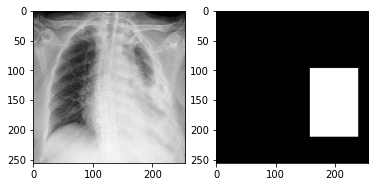

In [4]:
i_img = 42

fig, ax = plt.subplots(1,2)
plt.gray()
ax[0].imshow(dataset[i_img][0][0])
ax[1].imshow(dataset[i_img][1])

In [5]:
dataset[42][1].shape

(256, 256)

In [6]:
# get good split of dataset -> dividable by batch_size
batch_size = 16
l = len(dataset)
x = l // (batch_size *6 )
split = [x * batch_size * 5, l - x * batch_size * 5]
print(split)
train_set, val_set = torch.utils.data.random_split(dataset, split)

[5200, 1134]


In [7]:
dataloader_train = DataLoader(train_set, batch_size=batch_size,
                        shuffle=True, num_workers=0)#, pin_memory = True)
dataloader_val = DataLoader(val_set, batch_size=batch_size,
                        shuffle=True, num_workers=0, pin_memory = True)

# Get Network

In [8]:
from network.unet import Unet

# Get Training

In [9]:
from network.Model import OurModel

In [10]:
import torch.nn as nn
#criterion = nn.CrossEntropyLoss().cuda()
criterion = nn.BCELoss().cuda() # use binary cross entropy loss!
network = Unet()
path = "./_weights"

In [11]:
for x,y in dataloader_train:
    print("x", x.shape, x.dtype)
    print("y", y.shape, y.dtype)
    break

x torch.Size([16, 1, 256, 256]) torch.float64
y torch.Size([16, 256, 256]) torch.float64


In [12]:
training = OurModel(name = "Unet_first_try", network= network, criterion= criterion, path_dir = path, lr = 0.001, verbose = True, segmentation=True)

In [ ]:
training.train(142, dataloader_train)

  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

/home/students/patzig/AML_project/.venv/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch1: loss = 0.45587143301963806


  0%|          | 0/325 [00:00<?, ?it/s]

epoch2: loss = 0.4295605421066284


  0%|          | 0/325 [00:00<?, ?it/s]

epoch3: loss = 0.42567509412765503


  0%|          | 0/325 [00:00<?, ?it/s]

epoch4: loss = 0.42451173067092896


  0%|          | 0/325 [00:00<?, ?it/s]

epoch5: loss = 0.4231542646884918


  0%|          | 0/325 [00:00<?, ?it/s]

epoch6: loss = 0.41915446519851685


  0%|          | 0/325 [00:00<?, ?it/s]

epoch7: loss = 0.4175299108028412


  0%|          | 0/325 [00:00<?, ?it/s]

epoch8: loss = 0.41699445247650146


  0%|          | 0/325 [00:00<?, ?it/s]

epoch9: loss = 0.4162098169326782


  0%|          | 0/325 [00:00<?, ?it/s]

epoch10: loss = 0.41589829325675964


  0%|          | 0/325 [00:00<?, ?it/s]

epoch11: loss = 0.4151115417480469


  0%|          | 0/325 [00:00<?, ?it/s]

epoch12: loss = 0.5107746124267578


  0%|          | 0/325 [00:00<?, ?it/s]

epoch13: loss = 0.4185177981853485


  0%|          | 0/325 [00:00<?, ?it/s]

epoch14: loss = 0.41544800996780396


  0%|          | 0/325 [00:00<?, ?it/s]

epoch15: loss = 0.41623416543006897


  0%|          | 0/325 [00:00<?, ?it/s]

epoch16: loss = 0.41773584485054016


  0%|          | 0/325 [00:00<?, ?it/s]

epoch17: loss = 0.40933477878570557


  0%|          | 0/325 [00:00<?, ?it/s]

epoch18: loss = 0.40975871682167053


  0%|          | 0/325 [00:00<?, ?it/s]

epoch19: loss = 0.40403884649276733


  0%|          | 0/325 [00:00<?, ?it/s]

epoch20: loss = 0.399711549282074


  0%|          | 0/325 [00:00<?, ?it/s]

epoch21: loss = 0.3966256082057953


  0%|          | 0/325 [00:00<?, ?it/s]

epoch22: loss = 0.389980286359787


  0%|          | 0/325 [00:00<?, ?it/s]

epoch23: loss = 0.38765949010849


  0%|          | 0/325 [00:00<?, ?it/s]

epoch24: loss = 0.3843400776386261


  0%|          | 0/325 [00:00<?, ?it/s]

epoch25: loss = 0.38132649660110474


  0%|          | 0/325 [00:00<?, ?it/s]

epoch26: loss = 0.37615272402763367


  0%|          | 0/325 [00:00<?, ?it/s]

epoch27: loss = 0.3754757344722748


  0%|          | 0/325 [00:00<?, ?it/s]

epoch28: loss = 0.3699048161506653


  0%|          | 0/325 [00:00<?, ?it/s]

epoch29: loss = 0.37032708525657654


  0%|          | 0/325 [00:00<?, ?it/s]

epoch30: loss = 0.36762022972106934


  0%|          | 0/325 [00:00<?, ?it/s]

epoch31: loss = 0.3630892038345337


  0%|          | 0/325 [00:00<?, ?it/s]

epoch32: loss = 0.3626437485218048


  0%|          | 0/325 [00:00<?, ?it/s]

epoch33: loss = 0.3594408929347992


  0%|          | 0/325 [00:00<?, ?it/s]

epoch34: loss = 0.3592316210269928


  0%|          | 0/325 [00:00<?, ?it/s]

epoch35: loss = 0.35640406608581543


  0%|          | 0/325 [00:00<?, ?it/s]

epoch36: loss = 0.353913277387619


  0%|          | 0/325 [00:00<?, ?it/s]

epoch37: loss = 0.35438910126686096


  0%|          | 0/325 [00:00<?, ?it/s]

epoch38: loss = 0.35255885124206543


  0%|          | 0/325 [00:00<?, ?it/s]

epoch39: loss = 0.3508313298225403


  0%|          | 0/325 [00:00<?, ?it/s]

epoch40: loss = 0.3502296209335327


  0%|          | 0/325 [00:00<?, ?it/s]

epoch41: loss = 0.3466755747795105


  0%|          | 0/325 [00:00<?, ?it/s]

epoch42: loss = 0.3459829092025757


  0%|          | 0/325 [00:00<?, ?it/s]

epoch43: loss = 0.34513673186302185


  0%|          | 0/325 [00:00<?, ?it/s]

epoch44: loss = 0.34435591101646423


  0%|          | 0/325 [00:00<?, ?it/s]

epoch45: loss = 0.3433937728404999


  0%|          | 0/325 [00:00<?, ?it/s]

epoch46: loss = 0.34138548374176025


  0%|          | 0/325 [00:00<?, ?it/s]

epoch47: loss = 0.34129348397254944


  0%|          | 0/325 [00:00<?, ?it/s]

epoch48: loss = 0.3397335410118103


  0%|          | 0/325 [00:00<?, ?it/s]

epoch49: loss = 0.339629203081131


  0%|          | 0/325 [00:00<?, ?it/s]

epoch50: loss = 0.3378005623817444


  0%|          | 0/325 [00:00<?, ?it/s]

epoch51: loss = 0.33736464381217957


  0%|          | 0/325 [00:00<?, ?it/s]

epoch52: loss = 0.33612939715385437


  0%|          | 0/325 [00:00<?, ?it/s]

epoch53: loss = 0.3376879394054413


  0%|          | 0/325 [00:00<?, ?it/s]

epoch54: loss = 0.33640509843826294


  0%|          | 0/325 [00:00<?, ?it/s]

epoch55: loss = 0.33441558480262756


  0%|          | 0/325 [00:00<?, ?it/s]

epoch56: loss = 0.3344153165817261


  0%|          | 0/325 [00:00<?, ?it/s]

epoch57: loss = 0.3357236981391907


  0%|          | 0/325 [00:00<?, ?it/s]

epoch58: loss = 0.33337295055389404


  0%|          | 0/325 [00:00<?, ?it/s]

epoch59: loss = 0.33145445585250854


  0%|          | 0/325 [00:00<?, ?it/s]

epoch60: loss = 0.3300131559371948


  0%|          | 0/325 [00:00<?, ?it/s]

epoch61: loss = 0.32980987429618835


  0%|          | 0/325 [00:00<?, ?it/s]

epoch62: loss = 0.3313528299331665


  0%|          | 0/325 [00:00<?, ?it/s]

epoch63: loss = 0.32918381690979004


  0%|          | 0/325 [00:00<?, ?it/s]

epoch64: loss = 0.3284400403499603


  0%|          | 0/325 [00:00<?, ?it/s]

epoch65: loss = 0.3260781168937683


  0%|          | 0/325 [00:00<?, ?it/s]

epoch66: loss = 0.3269423842430115


  0%|          | 0/325 [00:00<?, ?it/s]

epoch67: loss = 0.32551345229148865


  0%|          | 0/325 [00:00<?, ?it/s]

epoch68: loss = 0.32708442211151123


  0%|          | 0/325 [00:00<?, ?it/s]

epoch69: loss = 0.3251778781414032


  0%|          | 0/325 [00:00<?, ?it/s]

epoch70: loss = 0.32570958137512207


  0%|          | 0/325 [00:00<?, ?it/s]

epoch71: loss = 0.32220301032066345


  0%|          | 0/325 [00:00<?, ?it/s]

epoch72: loss = 0.3217446804046631


  0%|          | 0/325 [00:00<?, ?it/s]

epoch73: loss = 0.32172542810440063


  0%|          | 0/325 [00:00<?, ?it/s]

epoch74: loss = 0.320404976606369


  0%|          | 0/325 [00:00<?, ?it/s]

epoch75: loss = 0.3202172517776489


  0%|          | 0/325 [00:00<?, ?it/s]

epoch76: loss = 0.3195918798446655


  0%|          | 0/325 [00:00<?, ?it/s]

In [ ]:
"""for i in range(10,100,10):
  print(f"epoch {i}")
  training.load_weights(f"/vanilla_dropout_e{i}.ckpt")
  training.val(dataloader_val)"""

In [ ]:
"""training.load_weights(f"/vanilla_e90.ckpt")
training.val(dataloader_val)
training.load_weights(f"/vanilla_dropout_e90.ckpt")
training.val(dataloader_val)"""

In [ ]:
criterion(torch.zeros((1,10,10)), torch.zeros((10,10)))